# Stima $R_t$

La stima di $R_t$ è effettuata mediante il modello semplificato SIRD

https://sciencecue.it/coronavirus-come-si-calcola-indice-contagiosita-rt/21898/

$R_t=\frac{\alpha}{\beta+\gamma}$

dove:

- $\alpha$= variazione **guarigioni** in un arco temporale predefinito
- $\beta$= variazione **infezioni** in un arco temporale predefinito
- $\gamma$=variazione **decessi** in un arco temporale predefinito

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1
#from aidam.miscellanea_utils import find_matlabstyle
#from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
#import pickle as pkl
import numpy as np
from covid_lib import read_covid_data, find_day_index

## Lettura dati

In [4]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 311
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-12-30T17:00:00


## Costanti e parametri

In [24]:
start_day=15
end_day=len(giorni)-1

regione='Italia'

time_horizon=14

print('Rt sarà stimato per %s dal %s al %s'%(regione,giorni[start_day][0:10],giorni[end_day][0:10]))

Rt sarà stimato per Italia dal 2020-03-10 al 2020-12-30


## Calcolo nuovo modello

https://www.scienzainrete.it/articolo/modo-semplice-calcolare-rt/roberto-battiston/2020-11-20

In [25]:
numero_giorni=end_day-start_day
rt=np.zeros(numero_giorni)


for i,day in enumerate(range(start_day,end_day)):
    temp1=np.log(trend['totale_positivi'][regione][day])
    temp2=np.log(trend['totale_positivi'][regione][day-time_horizon])
    gamma=1/9*(time_horizon-1)
    #print('Day %d - T1= %.2f   T2= %.2f'%(i,temp1,temp2))
    rt[i]=((temp1-temp2)/time_horizon+gamma)/gamma
    

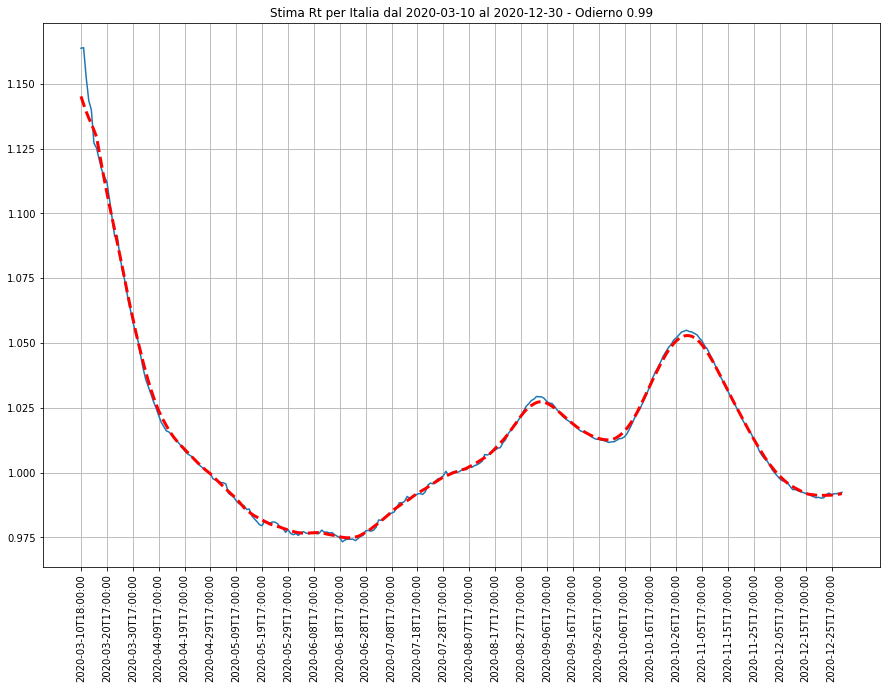

In [26]:
fig,ax=plt.subplots(1,figsize=(15,10))
ax.plot(rt)
ax.plot(moving_function_rev1(rt,np.mean,6,6),color='red',linestyle='--',linewidth=3)
ax.set_title('Stima Rt per %s dal %s al %s - Odierno %.2f'%(regione,giorni[start_day][0:10],giorni[end_day][0:10],rt[-1]))
ax.set_xticks(list(range(0,numero_giorni,10)))
ax.set_xticklabels(giorni[list(range(start_day,end_day,10))],rotation=90)
#ax.set_ylabel('%')
ax.grid()

# APPROCCIO b

In [ ]:
delta_days=7